In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [52]:
import pandas as pd
url='https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Indian%20Unicorn%20startups%202023%20updated.csv'
df=pd.read_csv(url)
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


In [53]:
print("Dataset shape:",df.shape)
print("columns Names:")
print(df.columns.tolist())
print("first 5 rows")
df.head()

Dataset shape: (102, 8)
columns Names:
['No.', 'Company', 'Sector', 'Entry Valuation^^ ($B)', 'Valuation ($B)', 'Entry', 'Location', 'Select Investors']
first 5 rows


,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


In [54]:
print("Data types:")
print(df.dtypes)
print("missing values:")
print(df.isnull().sum())

Data types:
No.                         int64
Company                    object
Sector                     object
Entry Valuation^^ ($B)    float64
Valuation ($B)            float64
Entry                      object
Location                   object
Select Investors           object
dtype: object
missing values:
No.                       0
Company                   0
Sector                    0
Entry Valuation^^ ($B)    0
Valuation ($B)            0
Entry                     0
Location                  0
Select Investors          0
dtype: int64


In [55]:
print("Duplicate rows:",df.duplicated().sum())

Duplicate rows: 0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No.                     102 non-null    int64  
 1   Company                 102 non-null    object 
 2   Sector                  102 non-null    object 
 3   Entry Valuation^^ ($B)  102 non-null    float64
 4   Valuation ($B)          102 non-null    float64
 5   Entry                   102 non-null    object 
 6   Location                102 non-null    object 
 7   Select Investors        102 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.5+ KB


In [57]:
df.describe()

,No.,Entry Valuation^^ ($B),Valuation ($B)
count,102.000000,102.000000,102.000000
mean,51.500000,1.547549,3.398020
std,29.588849,1.138013,4.710657
min,1.000000,1.000000,0.568000
25%,26.250000,1.000000,1.200000
50%,51.500000,1.200000,1.850000
75%,76.750000,1.582500,3.475000
max,102.000000,10.000000,37.600000


**key insights to Discuss:**
-Dataset contains 102 Indian unicorn startups
-No missing values(clean dataset)

In [58]:
df.columns = df.columns.str.strip()

In [59]:
df['Entry_Date'] = pd.to_datetime(df['Entry'], format='%b/%Y')
df['Entry_year'] = df['Entry_Date'].dt.year
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_year
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015


In [60]:
df['Valuation_Growth'] = df['Valuation ($B)'] / df['Entry Valuation^^ ($B)']

In [61]:
df['Primary_City'] = df['Location'].str.split('/').str[0]

In [62]:
df['Investors_Count'] = df['Select Investors'].str.count(',')+1
df.head()


,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_year,Valuation_Growth,Primary_City,Investors_Count
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000,Bangalore,3
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,Bangalore,5
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,Bangalore,3
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333,Delhi,5
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765,Noida,4


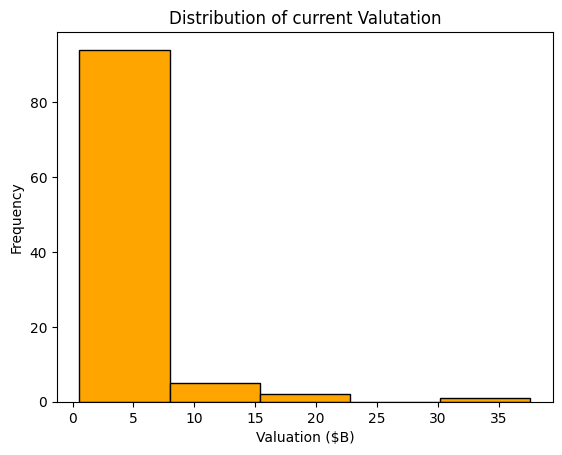

In [63]:
import matplotlib.pyplot as plt

plt.hist(df['Valuation ($B)'],bins=5,color='orange',edgecolor='black')
plt.title("Distribution of current Valutation")
plt.xlabel("Valuation ($B)")
plt.ylabel("Frequency")
plt.show()

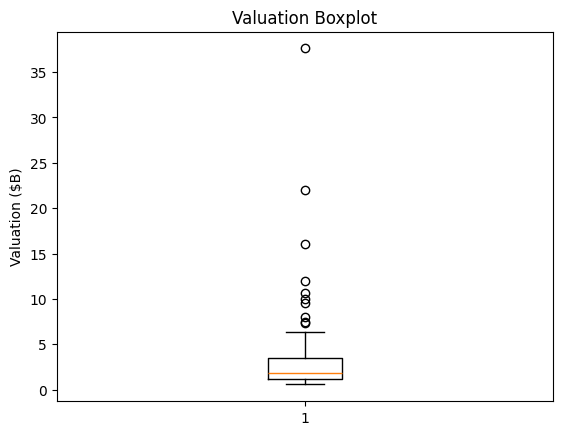

In [64]:
plt.boxplot(df['Valuation ($B)'])
plt.title('Valuation Boxplot')
plt.ylabel('Valuation ($B)')

plt.show()

Sector
Edtech                          5
E-Commerce                      4
Logistics Services              4
Marketplace - Used Cars         4
Gaming                          3
SaaS - CRM                      2
E-Commerce - Social Commerce    2
E-Commerce - Groceries          2
Foodtech                        2
Fintech - General Insurance     2
Name: count, dtype: int64


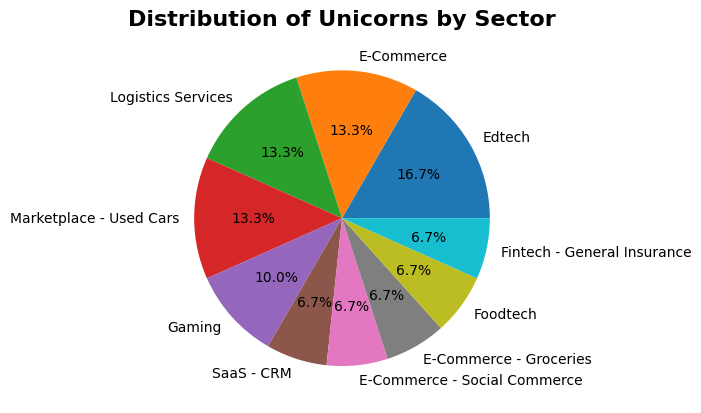

In [65]:
sector_counts = df['Sector'].value_counts().sort_values(ascending=False).head(10)
print(sector_counts)
plt.pie(sector_counts.values, labels=sector_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Unicorns by Sector', fontsize=16, fontweight='bold')

plt.show()

Sector
Edtech                          5
E-Commerce                      4
Logistics Services              4
Marketplace - Used Cars         4
Gaming                          3
SaaS - CRM                      2
E-Commerce - Social Commerce    2
E-Commerce - Groceries          2
Foodtech                        2
Fintech - General Insurance     2
Name: count, dtype: int64
---------
Index(['Edtech', 'E-Commerce', 'Logistics Services', 'Marketplace - Used Cars',
       'Gaming', 'SaaS - CRM', 'E-Commerce - Social Commerce',
       'E-Commerce - Groceries', 'Foodtech', 'Fintech - General Insurance'],
      dtype='object', name='Sector')


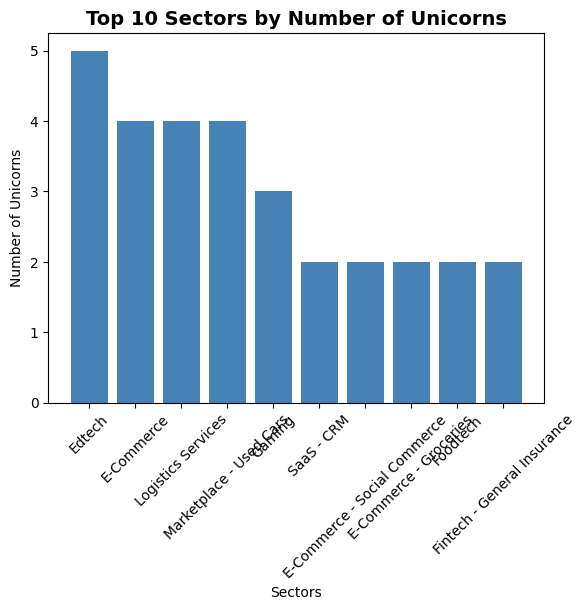

In [66]:
top_sectors = sector_counts
print(top_sectors)
print("---------")
print(top_sectors.index)
bars = plt.bar(top_sectors.index, top_sectors.values, color='steelblue')
plt.title('Top 10 Sectors by Number of Unicorns', fontsize=14, fontweight='bold')
plt.xlabel('Sectors')
plt.ylabel('Number of Unicorns')
plt.xticks(rotation=45) # to align labels on x axis properly

plt.show()

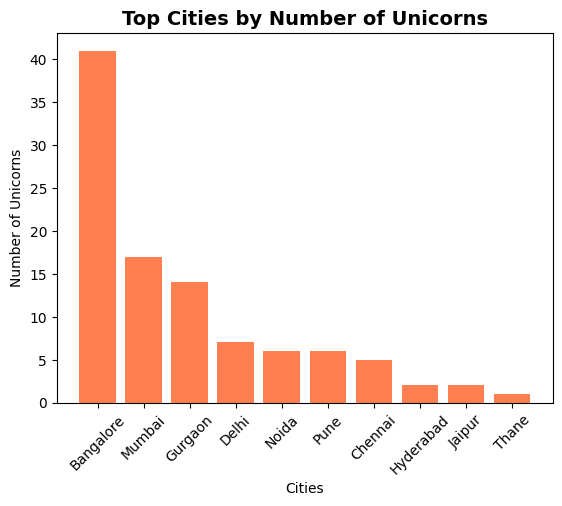

In [67]:
city_counts = df['Primary_City'].value_counts().head(10)
bars = plt.bar(city_counts.index, city_counts.values, color='coral')
plt.title('Top Cities by Number of Unicorns', fontsize=14, fontweight='bold')
plt.xlabel('Cities')
plt.ylabel('Number of Unicorns')
plt.xticks(rotation=45)
plt.show()

In [68]:
city_summary = df.groupby('Primary_City').agg({
    'Valuation ($B)': ['count', 'sum', 'mean'],
    'Entry_year': ['min', 'max']
})
city_summary.columns = ['Count', 'Total_Valuation', 'Avg_Valuation', 'First_Entry', 'Last_Entry']
print(city_summary.head(10))

              Count  Total_Valuation  Avg_Valuation  First_Entry  Last_Entry
Primary_City                                                                
Bangalore        41          185.200       4.517073         2011        2022
Chennai           5           12.200       2.440000         2018        2022
Delhi             7           15.530       2.218571         2014        2022
Goa               1            1.530       1.530000         2022        2022
Gurgaon          14           37.938       2.709857         2015        2022
Hyderabad         2            2.500       1.250000         2020        2022
Jaipur            2            2.900       1.450000         2021        2022
Mumbai           17           42.800       2.517647         2018        2022
Noida             6           30.900       5.150000         2015        2022
Pune              6           12.600       2.100000         2019        2022


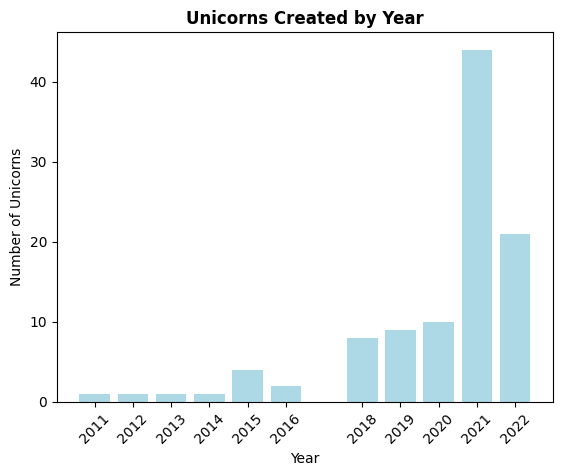

In [69]:
yearly_entries = df['Entry_year'].value_counts().sort_index()
bars = plt.bar(yearly_entries.index, yearly_entries.values, color='lightblue')
plt.title('Unicorns Created by Year', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Unicorns')
plt.xticks(yearly_entries.index, rotation=45)

plt.show()

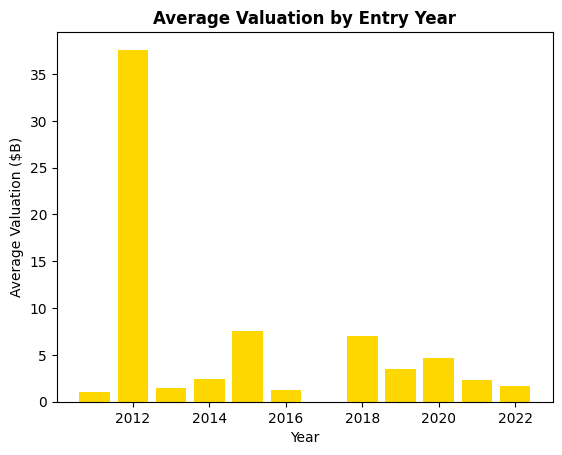

In [70]:
avg_val_by_year = df.groupby('Entry_year')['Valuation ($B)'].mean()
plt.bar(avg_val_by_year.index, avg_val_by_year.values, color='gold')
plt.title('Average Valuation by Entry Year', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Average Valuation ($B)')
plt.show()

Sector
Fintech - Payments & Wallet                 16.000
E-Commerce                                  11.025
Web3 Infrastructure - Dapps                 10.000
Proptech - Hotel Booking                     9.600
Foodtech                                     8.050
Fintech - Payment Gateway                    7.500
Fintech - Payments                           7.400
Mobility - Ride Aggregator                   7.300
Fintech - Payments & Credit Card Rewards     6.400
Edtech                                       5.720
Name: Valuation ($B), dtype: float64


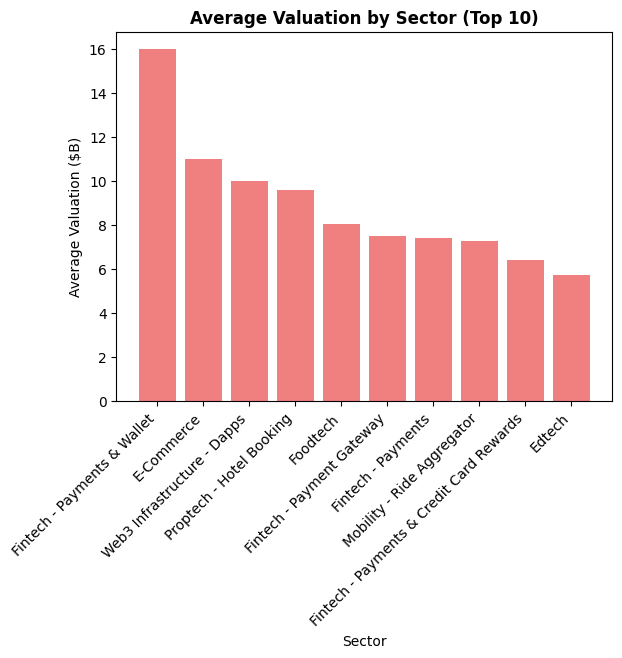

In [71]:
avg_valuation = df.groupby('Sector')['Valuation ($B)'].mean().sort_values(ascending=False).head(10)
print(avg_valuation)
bars = plt.bar(avg_valuation.index, avg_valuation.values, color='lightcoral')
plt.title('Average Valuation by Sector (Top 10)', fontweight='bold')
plt.xlabel('Sector')
plt.ylabel('Average Valuation ($B)')
plt.xticks(rotation=45,ha='right') # to align labels on x axis properly
plt.show()

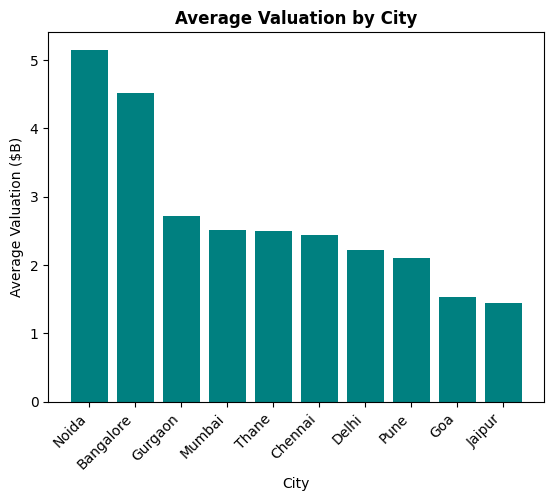

In [72]:
city_valuation = df.groupby('Primary_City')['Valuation ($B)'].mean().sort_values(ascending=False).head(10)
bars = plt.bar(city_valuation.index, city_valuation.values, color='teal')
plt.title('Average Valuation by City', fontweight='bold')
plt.xlabel('City')
plt.ylabel('Average Valuation ($B)')
plt.xticks(rotation=45, ha='right')
plt.show()

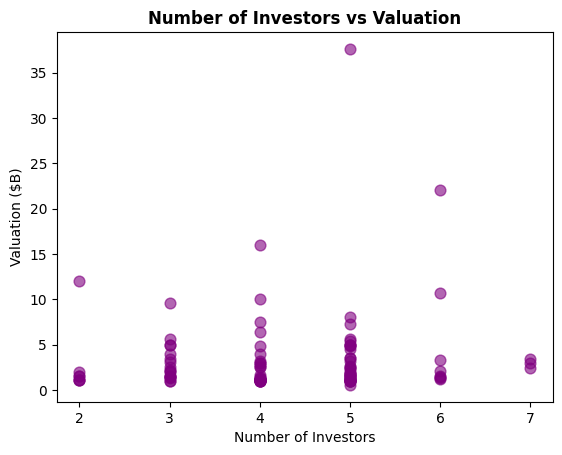

In [73]:
plt.scatter(df['Investors_Count'], df['Valuation ($B)'], alpha=0.6, s=60, color='purple')
plt.title('Number of Investors vs Valuation', fontweight='bold')
plt.xlabel('Number of Investors')
plt.ylabel('Valuation ($B)')
plt.show()

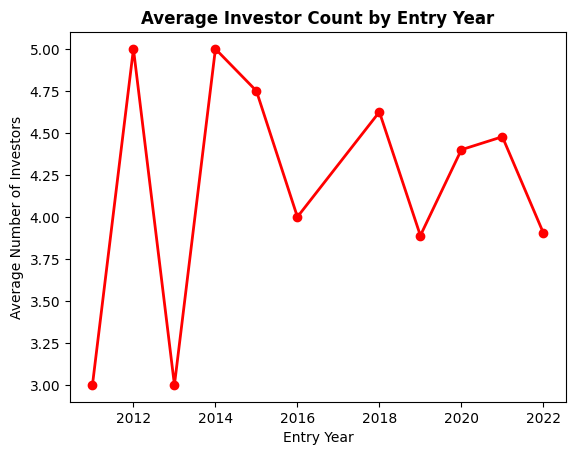

In [74]:
year_Investor = df.groupby('Entry_year')['Investors_Count'].mean()
plt.plot(year_Investor.index, year_Investor.values, marker='o', linewidth=2, markersize=6, color='red')
plt.title('Average Investor Count by Entry Year', fontweight='bold')
plt.xlabel('Entry Year')
plt.ylabel('Average Number of Investors')
plt.show()

In [75]:
print("Total Market Value:", df['Valuation ($B)'].sum())
print("Average Valuation:", df['Valuation ($B)'].mean())
print("Median Valuation:", df['Valuation ($B)'].median())


Total Market Value: 346.598
Average Valuation: 3.3980196078431373
Median Valuation: 1.85


In [76]:
print("SECTOR Diversity")
print(len(df['Sector'].unique()))

SECTOR Diversity
75


In [77]:
print(len(df['Primary_City'].unique()))

11


In [78]:
print("No of unicons after 2020")
print((df['Entry_year'] >= 2020).sum())

No of unicons after 2020
75


In [79]:
print("\n5. INVESTMENT INSIGHTS:")
print("Average Investors per Unicorn:", df['Investors_Count'].mean())
print("Average Valuation Growth:", df['Valuation_Growth'].mean())


5. INVESTMENT INSIGHTS:
Average Investors per Unicorn: 4.294117647058823
Average Valuation Growth: 2.4932787963344363


In [80]:
import pandas as pd
url='https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Indian%20Unicorn%20startups%202023%20updated.csv'
df = pd.read_csv(url)
df

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,1.00,1.00,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart^,E-Commerce,1.00,37.60,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,1.00,1.50,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal*,E-Commerce,1.80,2.40,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM^,Fintech - Payments & Wallet,1.70,16.00,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."
...,...,...,...,...,...,...,...,...
97,98,Purplle,E-Commerce - Personal Care & Cosmetics,1.10,1.10,Jun/2022,Mumbai,"JSW Ventures, IvyCap Ventures, Blume Ventures,..."
98,99,Leadsquared,SaaS - CRM,1.00,1.00,Jun/2022,Bangalore,"Stakeboat Capital, Gaja Capital, WestBridge"
99,100,OneCard,Fintech - Credit Cards,1.30,1.30,Jul/2022,Pune,"QED Investors, Matrix Partners India, Sequoia ..."
100,101,Shiprocket,Aggregator - Logistics Services,1.23,1.23,Aug/2022,Delhi,"Lightrock India, Info Edge, Tribe Capital, Tem..."


In [81]:
df.isnull().sum()

,0
No.,0
Company,0
Sector,0
Entry Valuation^^ ($B),0
Valuation ($B),0
Entry,0
Location,0
Select Investors,0


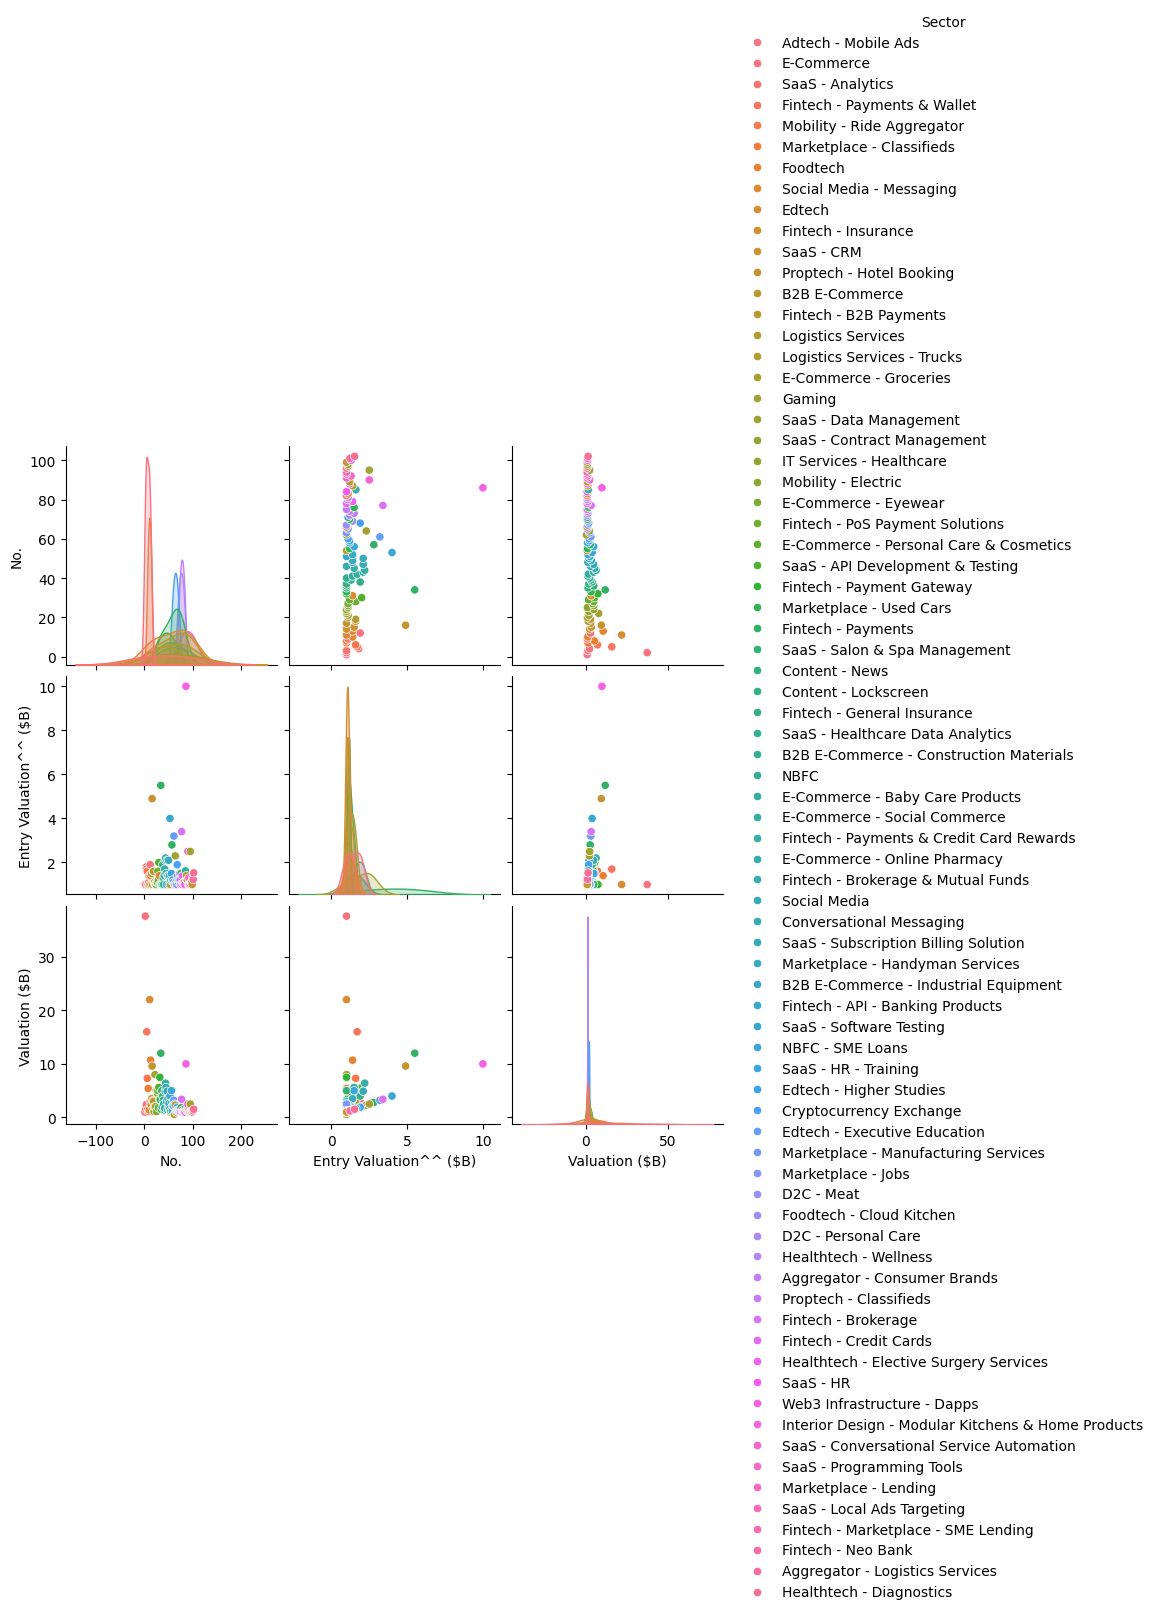

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df,hue='Sector')
plt.show()

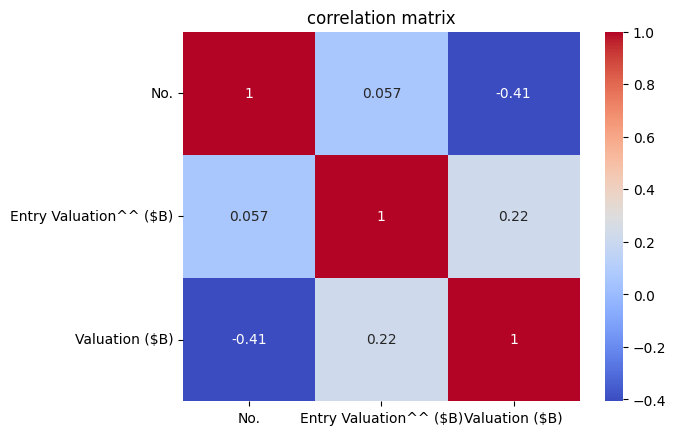

In [83]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True, cmap="coolwarm")
plt.title("correlation matrix")
plt.show()

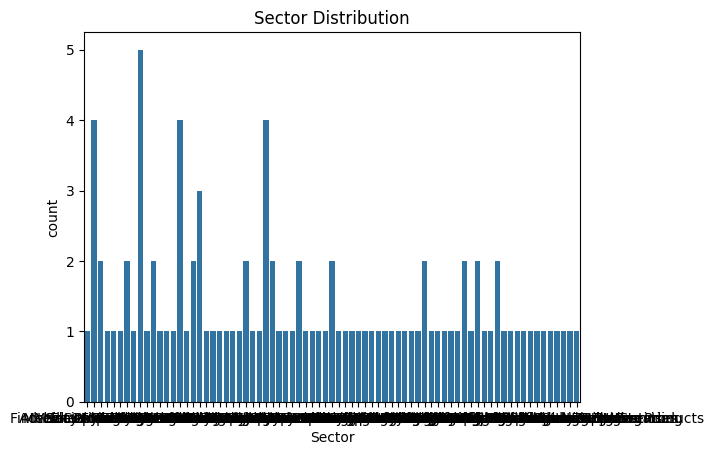

In [84]:
sns.countplot(x='Sector',data=df)
plt.title("Sector Distribution")
plt.show()

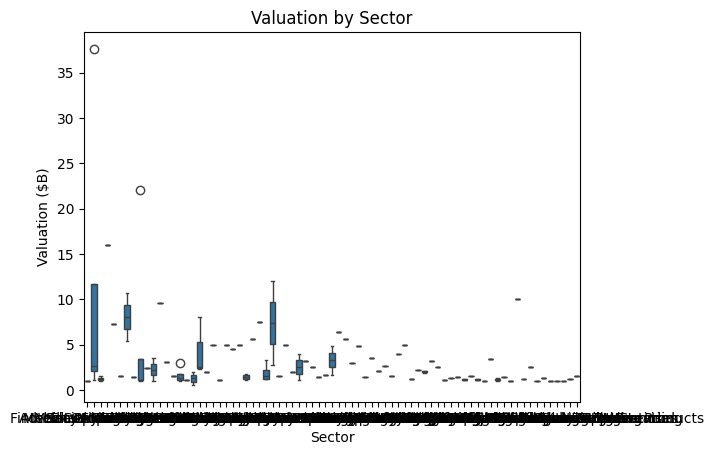

In [85]:
sns.boxplot(x='Sector',y='Valuation ($B)',data=df)
plt.title("Valuation by Sector")
plt.show()

In [86]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded

,No.,Entry Valuation^^ ($B),Valuation ($B),Company_Amagi Media Labs,Company_Apna.co,Company_BYJUS,Company_BharatPe,Company_BigBasket,Company_BillDesk,Company_BlackBuck,...,"Select Investors_Tiger Global, Sequoia Capital India, Hummingbird Ventures, Epiq Capital","Select Investors_Tiger Global, Sequoia Capital India, Ribbit Capital, Andreessen Horowitz, Coinbase Ventures","Select Investors_Tiger Global, Sequoia Capital India, SoftBank, Apoletto, Zomato","Select Investors_Tiger Global, Steadview Capital, Accel India, Elevation Capital, Vy Capital, Prosus Ventures","Select Investors_Tiger Global, Steadview Capital, Sapphire Ventures, Accel India, Insight Venture Partners","Select Investors_Tiger Global, Tencent","Select Investors_Tiger Global, Tencent, Foxconn","Select Investors_WestBridge, Lightspeed Ventures, M12 (Microsoft), Tiger Global, Steadview Capital","Select Investors_WestBridge, Nexus Ventures, Sequoia Capital","Select Investors_Whiteboard Capital, Z3Partners, Alpha Wave Global, Matrix Partners India, Tiger Global"
0,1,1.00,1.00,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1.00,37.60,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1.00,1.50,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,1.80,2.40,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,1.70,16.00,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,1.10,1.10,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
98,99,1.00,1.00,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99,100,1.30,1.30,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
100,101,1.23,1.23,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [87]:
x=df_encoded.drop('Valuation ($B)',axis=1)
y=df_encoded['Valuation ($B)']

In [88]:
x

,No.,Entry Valuation^^ ($B),Company_Amagi Media Labs,Company_Apna.co,Company_BYJUS,Company_BharatPe,Company_BigBasket,Company_BillDesk,Company_BlackBuck,Company_Blinkit^,...,"Select Investors_Tiger Global, Sequoia Capital India, Hummingbird Ventures, Epiq Capital","Select Investors_Tiger Global, Sequoia Capital India, Ribbit Capital, Andreessen Horowitz, Coinbase Ventures","Select Investors_Tiger Global, Sequoia Capital India, SoftBank, Apoletto, Zomato","Select Investors_Tiger Global, Steadview Capital, Accel India, Elevation Capital, Vy Capital, Prosus Ventures","Select Investors_Tiger Global, Steadview Capital, Sapphire Ventures, Accel India, Insight Venture Partners","Select Investors_Tiger Global, Tencent","Select Investors_Tiger Global, Tencent, Foxconn","Select Investors_WestBridge, Lightspeed Ventures, M12 (Microsoft), Tiger Global, Steadview Capital","Select Investors_WestBridge, Nexus Ventures, Sequoia Capital","Select Investors_Whiteboard Capital, Z3Partners, Alpha Wave Global, Matrix Partners India, Tiger Global"
0,1,1.00,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1.00,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1.00,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,1.80,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,1.70,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,1.10,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
98,99,1.00,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99,100,1.30,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
100,101,1.23,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [89]:
y

,Valuation ($B)
0,1.00
1,37.60
2,1.50
3,2.40
4,16.00
...,...
97,1.10
98,1.00
99,1.30
100,1.23


In [90]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-1.71515235, -0.48352072, -0.09950372, ..., -0.09950372,
        -0.09950372, -0.09950372],
       [-1.68118893, -0.48352072, -0.09950372, ..., -0.09950372,
        -0.09950372, -0.09950372],
       [-1.64722552, -0.48352072, -0.09950372, ..., -0.09950372,
        -0.09950372, -0.09950372],
       ...,
       [ 1.64722552, -0.21860158, -0.09950372, ..., -0.09950372,
        -0.09950372, -0.09950372],
       [ 1.68118893, -0.28041605, -0.09950372, ..., -0.09950372,
        -0.09950372, -0.09950372],
       [ 1.71515235, -0.0154969 , -0.09950372, ..., -0.09950372,
        -0.09950372, -0.09950372]])

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [92]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [93]:
y_pred=model.predict(x_test)

In [94]:
dframe=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
dframe

,Actual,Predicted
30,3.40,2.752732
67,1.90,2.248850
62,2.50,2.527352
47,1.40,3.162736
42,4.90,3.190261
40,1.40,2.656596
90,1.00,2.304728
45,3.00,3.155054
10,22.00,2.905577
0,1.00,6.195473


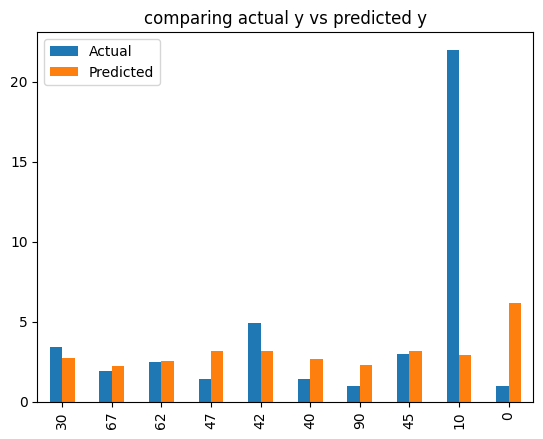

In [95]:
import matplotlib.pyplot as plt
dframe.head(10).plot(kind='bar')
plt.title("comparing actual y vs predicted y")
plt.show()

In [96]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
mse=mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("mean squared error:",mse)
print("root mean squared error:",rmse)

mean squared error: 36.93788205924401
root mean squared error: 6.0776543221249435


In [97]:
import pandas as pd
url='https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Indian%20Unicorn%20startups%202023%20updated.csv'
df = pd.read_csv(url)
df.head()


,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


In [98]:
df.isnull().sum()

,0
No.,0
Company,0
Sector,0
Entry Valuation^^ ($B),0
Valuation ($B),0
Entry,0
Location,0
Select Investors,0


In [99]:
df=pd.get_dummies(df,drop_first=True)
df

,No.,Entry Valuation^^ ($B),Valuation ($B),Company_Amagi Media Labs,Company_Apna.co,Company_BYJUS,Company_BharatPe,Company_BigBasket,Company_BillDesk,Company_BlackBuck,...,"Select Investors_Tiger Global, Sequoia Capital India, Hummingbird Ventures, Epiq Capital","Select Investors_Tiger Global, Sequoia Capital India, Ribbit Capital, Andreessen Horowitz, Coinbase Ventures","Select Investors_Tiger Global, Sequoia Capital India, SoftBank, Apoletto, Zomato","Select Investors_Tiger Global, Steadview Capital, Accel India, Elevation Capital, Vy Capital, Prosus Ventures","Select Investors_Tiger Global, Steadview Capital, Sapphire Ventures, Accel India, Insight Venture Partners","Select Investors_Tiger Global, Tencent","Select Investors_Tiger Global, Tencent, Foxconn","Select Investors_WestBridge, Lightspeed Ventures, M12 (Microsoft), Tiger Global, Steadview Capital","Select Investors_WestBridge, Nexus Ventures, Sequoia Capital","Select Investors_Whiteboard Capital, Z3Partners, Alpha Wave Global, Matrix Partners India, Tiger Global"
0,1,1.00,1.00,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1.00,37.60,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1.00,1.50,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,1.80,2.40,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,1.70,16.00,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,1.10,1.10,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
98,99,1.00,1.00,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99,100,1.30,1.30,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
100,101,1.23,1.23,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [100]:
x=df_encoded.drop('Valuation ($B)',axis=1)
y=df_encoded['Valuation ($B)']

In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [102]:
from sklearn.tree import DecisionTreeRegressor, export_text
regressor=DecisionTreeRegressor(max_depth=4, random_state=42)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [103]:
y_pred=regressor.predict(x_test)

In [104]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("mean squared error:",mse)
print("root mean squared error:",rmse)

mean squared error: 99.63591532048332
root mean squared error: 9.981779166084738


In [105]:
import pandas as pd
url='https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Indian%20Unicorn%20startups%202023%20updated.csv'
df = pd.read_csv(url)
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


In [106]:
x=df[['Company','Sector','Entry Valuation^^ ($B)','Entry','Location','Select Investors']]
y=df[['Valuation ($B)']]

In [107]:
x=pd.get_dummies(x,drop_first=True)
y=pd.get_dummies(y,drop_first=True)

In [108]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
x_scaled=sc_x.fit_transform(x)
y_scaled=sc_y.fit_transform(y)

In [109]:
y_scaled=y_scaled.ravel()
y_scaled

array([-5.11576536e-01,  7.29640851e+00, -4.04910074e-01, -2.12910442e-01,
        2.68841733e+00,  8.32420889e-01, -4.04910074e-01,  4.27088332e-01,
       -4.90243244e-01, -4.26243367e-01,  3.96841488e+00, -8.49106870e-02,
        1.55775283e+00, -2.12910442e-01,  2.17557753e-02,  1.32308662e+00,
       -6.35773946e-02, -3.83576782e-01, -8.49106870e-02, -4.90243244e-01,
       -2.98243612e-01,  9.81753936e-01, -2.98243612e-01,  3.41755162e-01,
       -4.90243244e-01,  3.41755162e-01,  2.35088700e-01,  3.41755162e-01,
       -3.40910197e-01,  4.69754917e-01,  4.22482851e-04,  8.75087474e-01,
       -2.09108096e-02,  1.83508564e+00, -4.04910074e-01,  3.41755162e-01,
       -2.98243612e-01,  1.28422238e-01, -4.22441021e-02, -1.91577149e-01,
       -4.26243367e-01, -3.62243489e-01,  3.20421870e-01,  6.40421257e-01,
        4.69754917e-01, -8.49106870e-02,  3.20421870e-01, -4.26243367e-01,
        2.17557753e-02, -2.76910319e-01, -1.70243857e-01, -4.04910074e-01,
        1.28422238e-01, -

In [110]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(x_scaled, y_scaled)

SVR(C=100)

In [111]:
y_pred_scaled = svr.predict(x_scaled)
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

In [112]:
import numpy as np
dframe=pd.DataFrame({'Actual':np.array(y).reshape(-1,),'Predicted':y_pred.reshape(-1,)})
dframe

,Actual,Predicted
0,1.00,1.468315
1,37.60,37.131301
2,1.50,1.968090
3,2.40,2.868517
4,16.00,15.533251
...,...,...
97,1.10,1.568455
98,1.00,1.468900
99,1.30,1.768387
100,1.23,1.699968


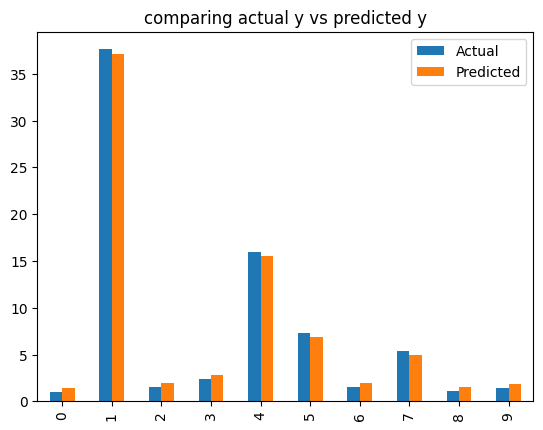

In [113]:
import matplotlib.pyplot as plt
dframe.head(10).plot(kind='bar')
plt.title("comparing actual y vs predicted y")
plt.show()

In [114]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
mse=mean_squared_error(y,y_pred)
rmse=np.sqrt(mse)
print("mean squared error:",mse)
print("root mean squared error:",rmse)

mean squared error: 0.21061086824665406
root mean squared error: 0.4589235973957474
